# DNA Damage model formation & Prediction

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [127]:
warnings.filterwarnings(action = 'ignore')

## 1. Preparing Cell Painting Data & Cell Health Data

### Load IDR-0080 Data & Cell Health Data
### Reference : https://pubmed.ncbi.nlm.nih.gov/33534641/

In [128]:
x_df = pd.read_csv('x_df.csv', index_col = None)
x_df = x_df.iloc[:, 1:]
x_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,-0.155631,0.014646,0.188053,1.231056,0.031064,-0.585477,0.467976,0.254203,0.129446,0.027104,...,0.882859,0.841687,0.339831,0.562585,0.879950,0.904785,0.923143,0.944998,0.984938,0.961945
1,-0.247842,-0.030773,0.433778,0.062456,0.266860,0.838679,-0.467417,0.340793,-0.024450,0.418928,...,0.513820,0.344554,0.134318,0.018933,0.359496,0.557998,0.504751,0.407462,0.522251,0.519441
2,0.794740,0.743296,-0.438752,0.827288,-0.728499,-0.422394,-0.147624,0.083870,-0.160722,-0.363004,...,-0.456539,0.373750,-0.111184,-0.042733,-0.840771,-0.536215,-0.497296,-0.748232,-0.515240,-0.526734
3,0.480421,0.821096,-0.337898,0.054479,-0.662314,0.067979,0.025010,0.158138,-0.342062,-0.434783,...,0.115466,0.186411,0.249292,0.688435,-0.521766,0.124801,0.063444,-0.560178,-0.062851,0.026056
4,-0.074895,0.569377,0.571678,0.976504,-1.111947,1.348542,0.584906,-3.128483,-2.324773,1.945741,...,0.154802,2.975785,1.128414,-0.638839,0.753884,0.808944,0.594059,0.674015,0.140325,0.417465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.247953,0.331462,-0.228694,0.648857,-0.394799,-0.477804,-0.203016,0.387554,0.485502,-0.302333,...,0.305814,0.952718,0.697652,0.087784,0.266722,0.254346,0.367875,0.191115,0.220894,0.257950
353,1.455427,1.153796,-1.395398,1.167778,-1.413069,-0.684198,-0.923160,-0.145706,-0.535382,0.224011,...,-0.207834,-0.280317,-0.422648,-0.763835,-0.254697,-0.380000,-0.404530,-0.266026,-0.341998,-0.287431
354,0.719510,0.691270,-0.999921,0.701489,-0.965601,-0.937154,-0.218680,0.145943,-0.149745,-0.637266,...,0.011171,-0.575574,-0.272102,-0.101586,-0.117305,-0.083261,-0.085342,-0.213054,-0.126822,-0.101668
355,-0.255658,0.075113,0.999995,0.251456,0.237111,0.342004,0.084765,0.957639,-0.562746,-0.409896,...,0.766721,0.518347,1.450779,1.421830,1.483743,0.639279,0.614153,1.624128,0.523767,0.603819


In [129]:
# Load cell health data
y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['cc_all_n_spots_h2ax_per_nucleus_area_mean']

### Load Chemical Annotation Data
### Reference : https://gigadb.org/dataset/100351

In [130]:
# Chemical annotation 
chem_dat = pd.read_csv('chemical_annotations.csv')
chem_dat

,BROAD_ID,CPD_NAME,CPD_NAME_TYPE,CPD_SAMPLE_ID,DOS_LIBRARY,SOURCE_NAME,CHEMIST_NAME,VENDOR_CATALOG_ID,CPD_SMILES,USERCOMMENT
0,BRD-A56675431-001-04-0,altizide,INN,SA82748,NaN,Prestwick Chemical Inc.,NaN,Prestw-721,NS(=O)(=O)c1cc2c(NC(CSCC=C)NS2(=O)=O)cc1Cl,NaN
1,BRD-A51829654-001-01-4,"BRL-15,572",common,SA82481,NaN,Biomol International Inc.,NaN,AC-536,OC(CN1CCN(CC1)c1cccc(Cl)c1)C(c1ccccc1)c1ccccc1,NaN
2,BRD-K04046242-001-03-6,equilin,primary-common,SA82922,NaN,Prestwick Chemical Inc.,NaN,Prestw-850,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc34)[C@@H]1CCC2=O,NaN
3,BRD-K16508793-001-01-8,diazepam,INN,SA59660,NaN,MicroSource Discovery Systems Inc.,NaN,1900003,CN1c2ccc(Cl)cc2C(=NCC1=O)c1ccccc1,NaN
4,BRD-K09397065-001-01-6,SR 57227A,to-be-curated,SA82504,NaN,Biomol International Inc.,NaN,AC-561,NC1CCN(CC1)c1cccc(Cl)n1,NaN
...,...,...,...,...,...,...,...,...,...,...
30611,BRD-K47092271-001-01-7,BRD-K47092271,BROAD_CPD_ID,SA799574,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCC(=O)Nc1ccc2O[C@@H]3[C@@H](C[C@H](CC(=O)NCC...,NaN
30612,BRD-K30358777-001-01-0,BRD-K30358777,BROAD_CPD_ID,SA800605,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COc1ccc(CNC(=O)C[C@@H]2C[C@H]3[C@H](Oc4ccc(NC(...,NaN
30613,BRD-K32423836-001-01-9,BRD-K32423836,BROAD_CPD_ID,SA799806,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCCNC(=O)C[C@H]1C[C@@H]2[C@@H](Oc3ccc(NC(=O)C...,NaN
30614,BRD-K28250273-001-01-2,BRD-K28250273,BROAD_CPD_ID,SA1482018,Azetidine Nitrile Full Library,Broad Institute of MIT and Harvard,NaN,NaN,OC[C@H]1[C@H]([C@H](C#N)N1C(=O)Nc1cccc(F)c1)c1...,NaN


In [131]:
# Load validation datasets
x_val_dat = pd.read_csv('x_val_df.csv')
x_val_meta = pd.read_csv('x_val_meta.csv')

In [132]:
# Check unique compound in validation dataset
compound = x_val_meta['Metadata_broad_sample'].unique()
len(compound)

30617

# 2. Regression Model Formation & Accuracy Check

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.15, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Various Regression Models
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'Support Vector Regressor' : SVR(),
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor(),
    'Bayesian Ridge' : BayesianRidge(),
    'Elastic Net' : ElasticNet(),
    'AdaBoost Regressor' : AdaBoostRegressor(),
    'MLP Regressor' : MLPRegressor(),
    'XGBoost Regressor' : XGBRegressor(),
    'LightGBM Regressor' : LGBMRegressor()
}



# Parameter grids for linear models and tree-based models
linear_param_grids = {
    'Ridge Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression' : {'alpha' : [0.1, 1.0, 10.0, 100.0]},
    'Support Vector Regression' : {'C' : [0.1, 1.0, 10.0], 'epsilon' : [0.01, 0.1, 1]},
    'K-Nearest Neighbors Regressor' : {'n_neighbors' : [3, 5, 7, 9]},
    'Bayesian Ridge' : {},
    'Elastic Net' : {'alpha' : [0.1, 1.0, 10.0], 'l1_ratio' : [0.1, 0.5, 0.9]}
}

tree_param_grids = {
    'Decision Tree Regressor' : {'max_depth' : [None, 10, 20, 30]},
    'Random Forest Regressor' : {'n_estimators' : [100, 200, 300], 'max_depth' : [None, 10, 20]},
    'Gradient Boosting Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]},
    'AdaBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 1.0]},
    'MLP Regressor' : {'hidden_layer_sizes' : [(50,), (100,), (50, 50)], 'alpha' : [0.0001, 0.001, 0.01]},
    'XGBoost Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]},
    'LightGBM Regressor' : {'n_estimators' : [50, 100, 200], 'learning_rate' : [0.01, 0.1, 0.2]}
}


# Results Save
best_models = {}
best_params = {}

# Model Class dict
model_classes = {
    'Ridge Regression' : Ridge,
    'Lasso Regression' : Lasso,
    'Support Vector Regression' : SVR,
    'K-Nearest Neighbors Regressor' : KNeighborsRegressor,
    'Decision Tree Regressor' : DecisionTreeRegressor,
    'Random Forest Regressor' : RandomForestRegressor,
    'Gradient Boosting Regressor' : GradientBoostingRegressor,
    'Bayesian Ridge' : BayesianRidge,
    'Elastic Net' : ElasticNet,
    'AdaBoost Regressor' : AdaBoostRegressor,
    'MLP Regressor' : MLPRegressor,
    'XGBoost Regressor' : XGBRegressor,
    'LightGBM Regressor' : LGBMRegressor    
}

# GridSearchCV and training loop for linear models
for model_name, param_grid in linear_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_


    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')

# GridSearchCV and training loop for tree-based models
for model_name, param_grid in tree_param_grids.items():
    model = model_classes[model_name]()
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Best Parameteres: {grid_search.best_params_}')
    print(f'{model_name} (After tuning):')
    print(f'  Mean Squared Error = {mse}')
    print(f'  Root Mean Squared Error = {rmse}')
    print(f'  R² Score = {r2}\n')



# Output the best parameters & r2 score for each model
print('Best parameters:')
for model_name, params in best_params.items():
    print(f'{model_name} : {params}')

Ridge Regression Best Parameters: {'alpha': 100.0}
Ridge Regression (After tuning):
  Mean Squared Error = 0.2984360964204377
  Root Mean Squared Error = 0.5462930499470388
  R² Score = 0.5690870254230795

Lasso Regression Best Parameters: {'alpha': 0.1}
Lasso Regression (After tuning):
  Mean Squared Error = 0.452081430096852
  Root Mean Squared Error = 0.6723700098136829
  R² Score = 0.3472379644063672

Support Vector Regression Best Parameters: {'C': 1.0, 'epsilon': 0.1}
Support Vector Regression (After tuning):
  Mean Squared Error = 0.4343149827772591
  Root Mean Squared Error = 0.6590257830899025
  R² Score = 0.37289100287583044

K-Nearest Neighbors Regressor Best Parameters: {'n_neighbors': 9}
K-Nearest Neighbors Regressor (After tuning):
  Mean Squared Error = 0.42784423126690735
  Root Mean Squared Error = 0.6540980287899569
  R² Score = 0.3822341447226718

Bayesian Ridge Best Parameters: {}
Bayesian Ridge (After tuning):
  Mean Squared Error = 0.3104066510620054
  Root Mean S

## Regression Results

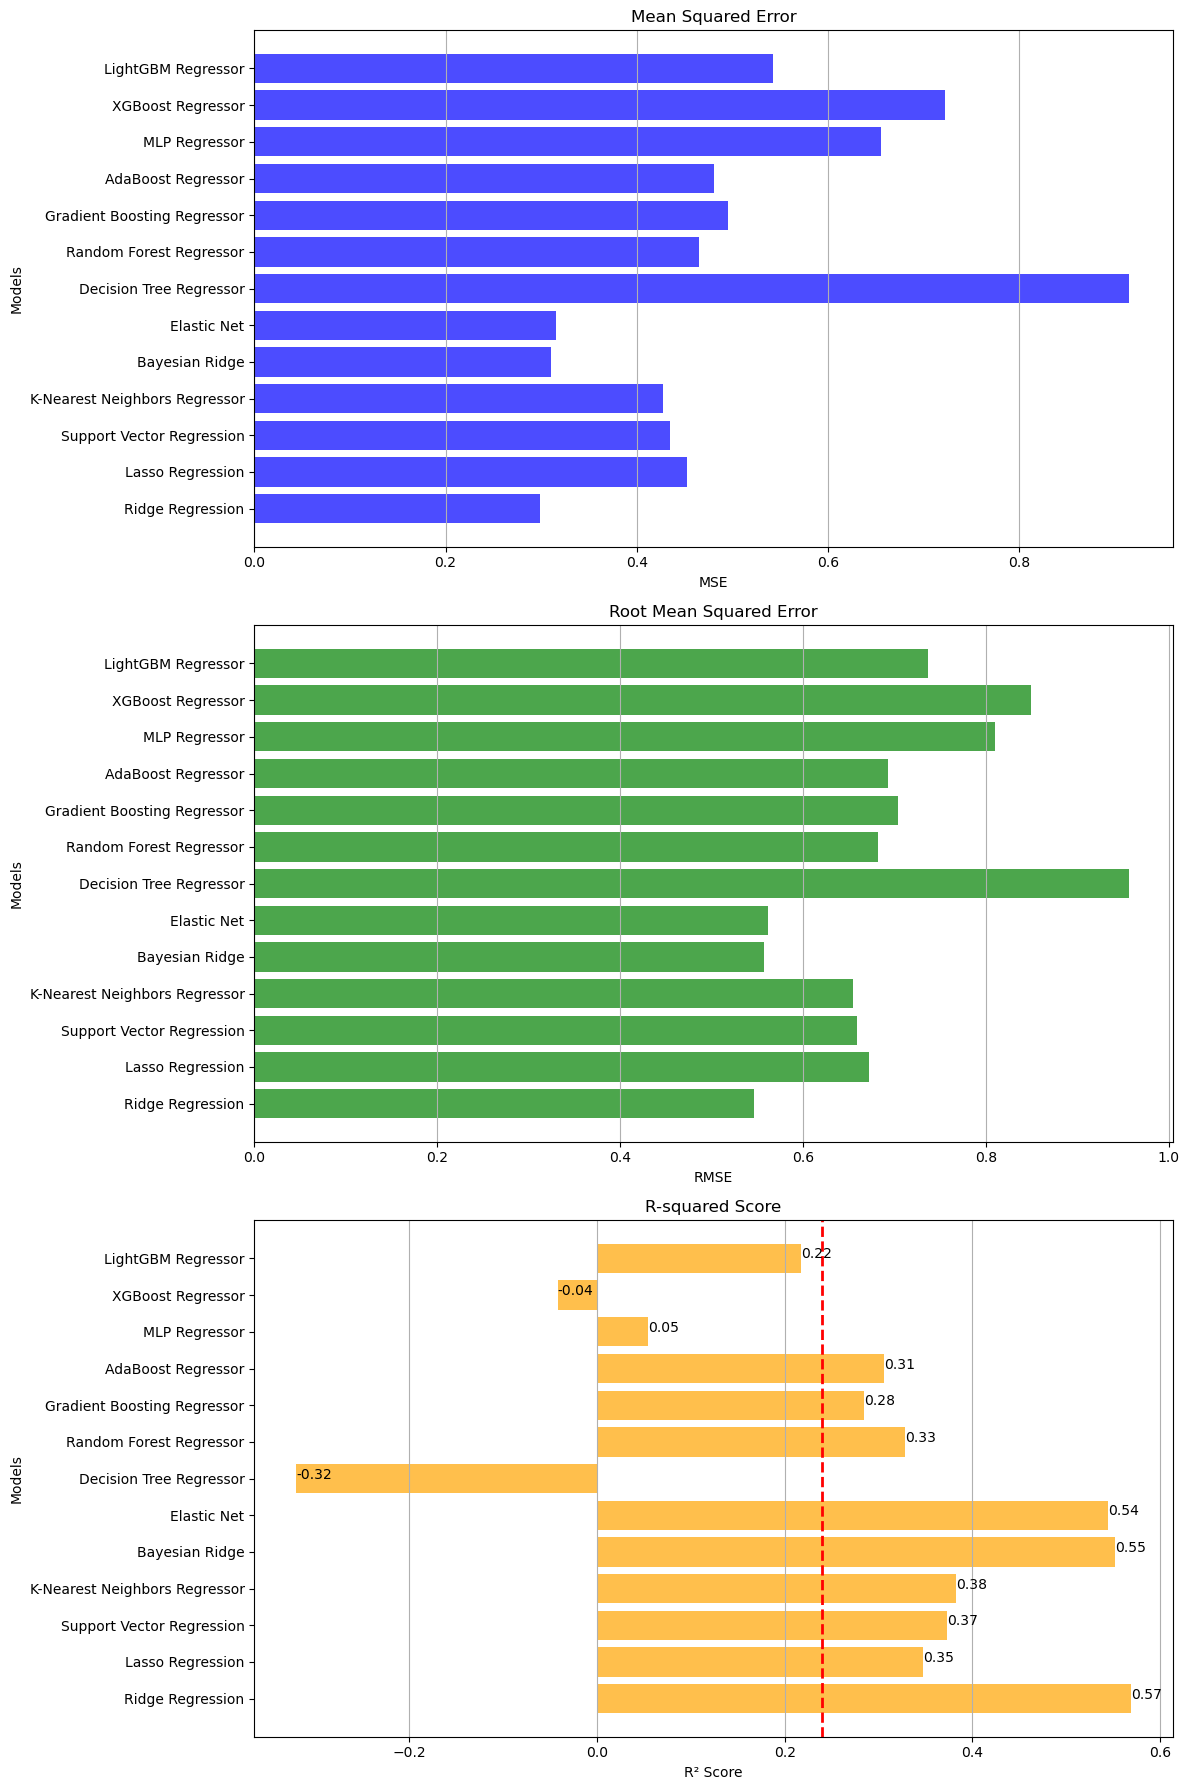

In [20]:
# Initialize lists to store evaluation metrics
model_names = []
mse_scores = []
rmse_scores = []
r2_scores = []


# Evaluate and collect scores for each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)


    # Valculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store scores and model names
    model_names.append(model_name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


# Plotting the scores
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))


# Mean Squared Error plot
ax1.barh(model_names, mse_scores, color='blue', alpha=0.7)
ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.set_ylabel('Models')
ax1.xaxis.grid(True)

# Root Mean Squared Error plot
ax2.barh(model_names, rmse_scores, color='green', alpha=0.7)
ax2.set_title('Root Mean Squared Error')
ax2.set_xlabel('RMSE')
ax2.set_ylabel('Models')
ax2.xaxis.grid(True)

# R-squared plot
ax3.barh(model_names, r2_scores, color='orange', alpha=0.7)
for model_name, scores in zip(model_names, r2_scores):
    ax3.text(scores, model_name, f'{scores:.2f}')
ax3.set_title('R-squared Score')
ax3.set_xlabel('R² Score')
ax3.set_ylabel('Models')
ax3.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax3.xaxis.grid(True)

plt.tight_layout()
plt.savefig('accuracy_results.png')
plt.show()

# 3. Cell Health Labeling for Classification Model

In [133]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import random

# Fix random seeds for reproducibility
def set_seed(seed_value):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Set the seed
seed_value = 42
set_seed(seed_value)

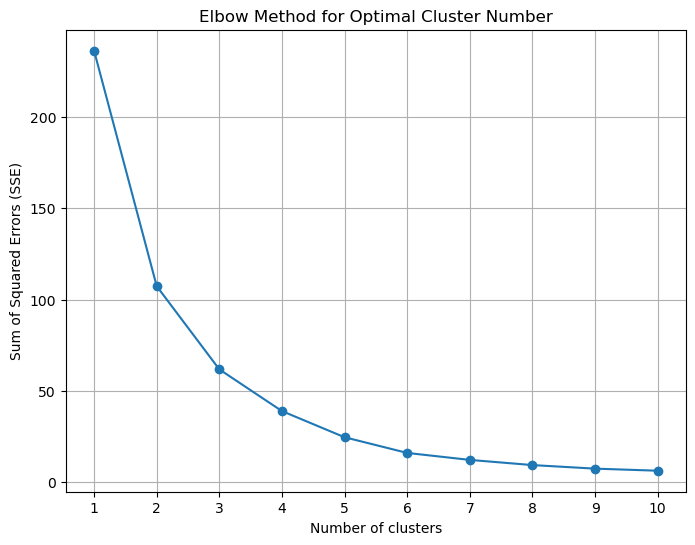

In [134]:
from sklearn.cluster import KMeans

# Create an array to store SSE values for different cluster numbers
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(y_df.values.reshape(-1, 1))
    sse.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig('Elbow Method.png')
plt.show()

In [151]:
# y_df Categorized

kmeans = KMeans(n_clusters = 6, random_state = 42)
y_clusters = kmeans.fit_predict(y_df.values.reshape(-1, 1))

y_df_binarized = y_clusters

In [154]:
from collections import Counter

Counter(y_df_binarized)

Counter({0: 306, 1: 51})

In [107]:
#y_df.sort_values(ascending = False).to_excel('y_df_1.xlsx')

In [153]:
# Remapping
mapping = {4: 0, 0: 0, 3: 0, 5: 0, 2: 1, 1: 1} # 0 : Low, 1: High
y_df_binarized = np.vectorize(mapping.get)(y_df_binarized)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [156]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.15, stratify=y_df_binarized, random_state = 42)

# Data Flatten
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [157]:
# Check data stratified
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 260, 1: 43})
Counter({0: 46, 1: 8})


# 4. Classification Model Formation & Check Accuracy

In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}
result = {}
fold_results = {}

# Setting Stratified K-Fold 
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=stratified_kfold, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Show Best Parameters & cross val results
    cv_results = grid_search.cv_results_

    fold_r2_scores = []
    for i in range(5):
        fold_score = cv_results[f'split{i}_test_score'][grid_search.best_index_]
        fold_r2_scores.append(fold_score)
        print(f'Fold {i+1} Accuracy: {fold_score}')
    
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")
    # Generate the classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store reulst 
    result[model_name] = {
        'f1_score' : report['weighted avg']['f1-score'],
        'accuracy' : report['accuracy']
    }

    
# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Fold 1 Accuracy: 0.8688524590163934
Fold 2 Accuracy: 0.8688524590163934
Fold 3 Accuracy: 0.8852459016393442
Fold 4 Accuracy: 0.8666666666666667
Fold 5 Accuracy: 0.8833333333333333
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-validation Accuracy for RandomForest: 0.8746

Test Accuracy for RandomForest: 0.9074
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       1.00      0.38      0.55         8

    accuracy                           0.91        54
   macro avg       0.95      0.69      0.75        54
weighted avg       0.92      0.91      0.89        54

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Fold 1 

## Classification Accuracy

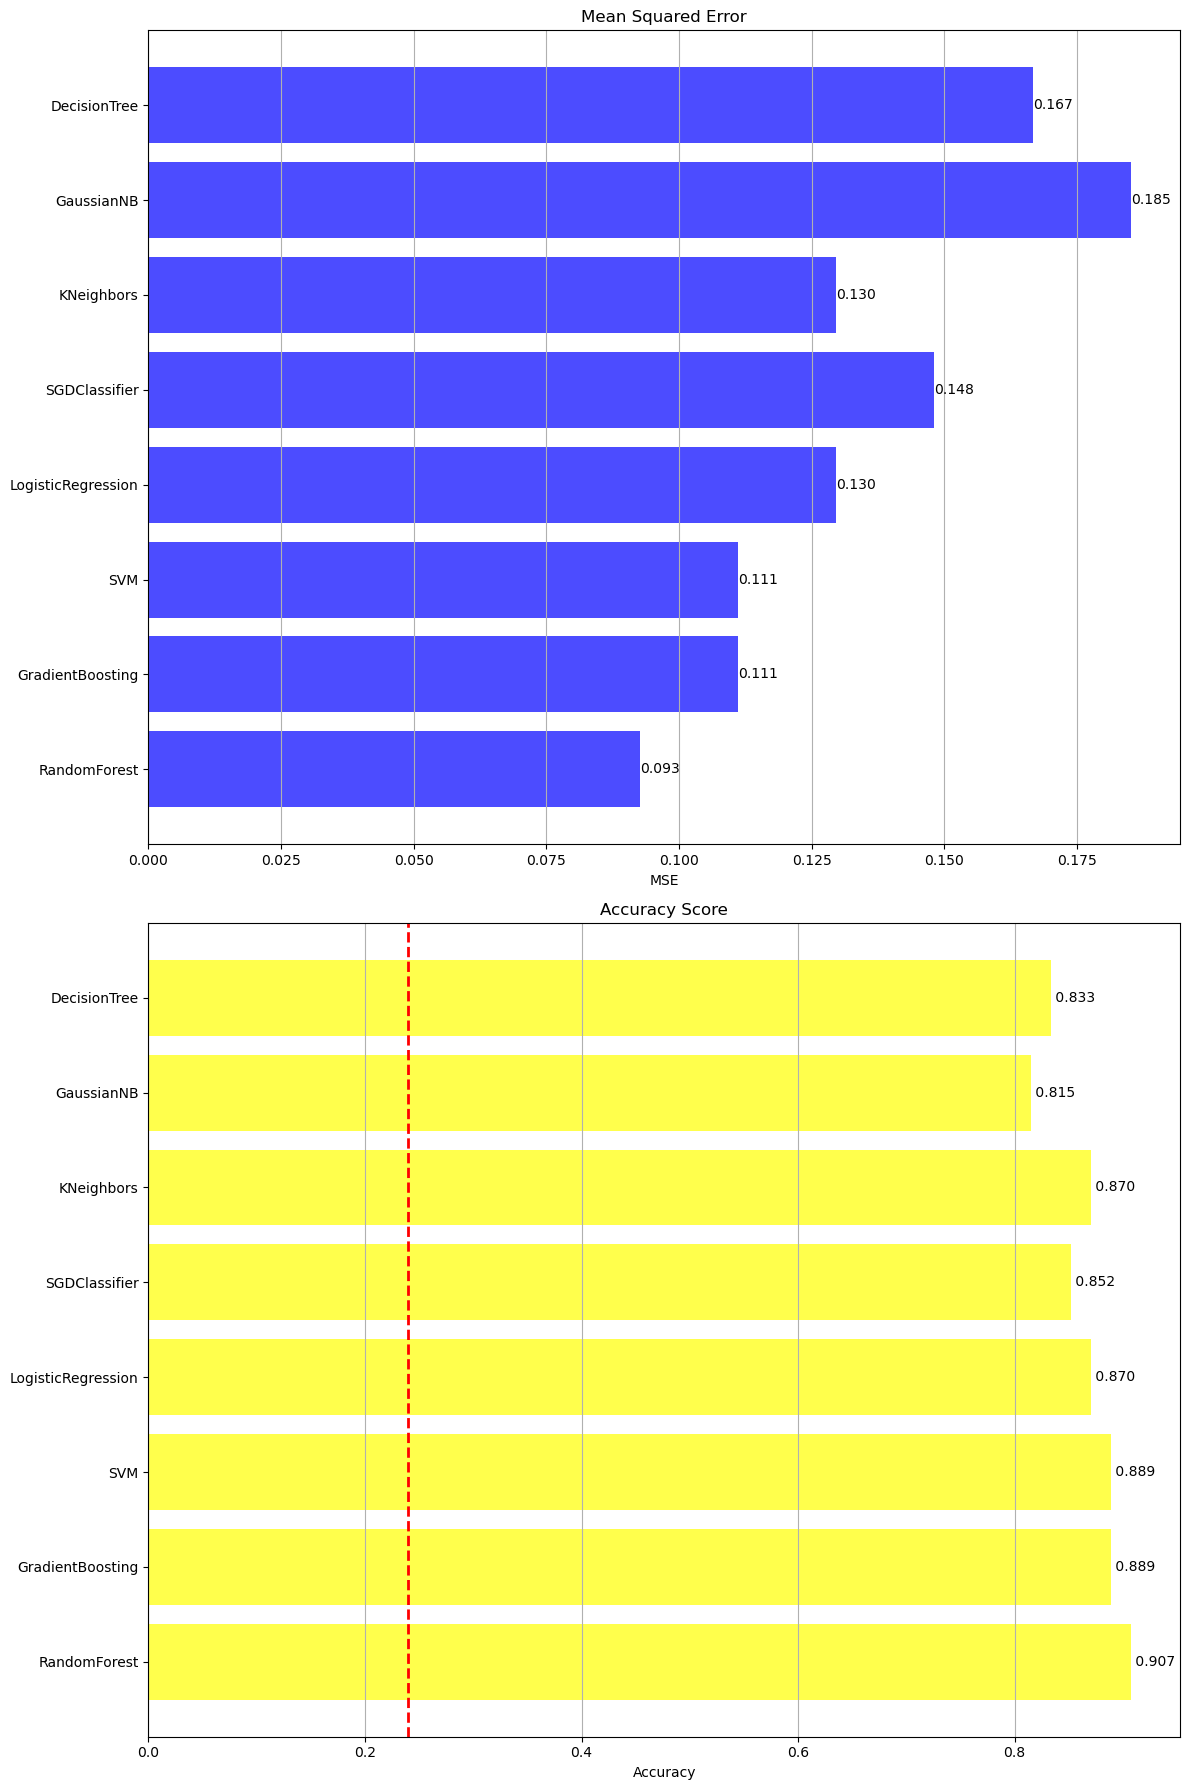

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 18))

for model, metrics in results.items():
    ax1.barh(model, metrics['mse'], color = 'blue', alpha = 0.7)
    ax1.text(metrics['mse'], model, f"{metrics['mse']:.3f}", va = 'center')
    ax2.barh(model, metrics['accuracy'], color = 'yellow', alpha = 0.7)
    ax2.text(metrics['accuracy'], model, f"{metrics['accuracy']: .3f}", va = 'center')



ax1.set_title('Mean Squared Error')
ax1.set_xlabel('MSE')
ax1.xaxis.grid(True)

ax2.set_title('Accuracy Score')
ax2.set_xlabel('Accuracy')
ax2.axvline(x = 0.24, color = 'red', linestyle = '--', linewidth = 2)
ax2.xaxis.grid(True)

plt.tight_layout()
plt.savefig('X.png')
plt.show()

# 5. Deep Learning Model Formation & Check Accuracy

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from tensorflow import keras

def evaluate_model(X_test, y_test, model_path='best_model.keras', threshold=0.5):
    """
    Evaluate a trained model on the test set, generating confusion matrix, ROC curve, 
    and classification report.
    
    Args:
    X_test (ndarray): Test set features.
    y_test (ndarray): Test set true labels.
    model_path (str): Path to the saved Keras model. Default is 'best_model.keras'.
    threshold (float): Threshold for classifying probabilities to labels. Default is 0.5.

    Outputs:
    - Confusion matrix plot (saved as 'Confusion_Matrix.png')
    - ROC curve plot (saved as 'ROC_Curve.png')
    - Prints classification report
    """

    # Load Best Model
    model = keras.models.load_model(model_path)
    
    # Predict and classify using the threshold
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > threshold).astype(int)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Annotate Confusion Matrix
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = [f'{value}' for value in conf_matrix.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=labels, fmt='', cbar=False, cmap='Blues')
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.tight_layout()
    plt.savefig('Confusion_Matrix.png', dpi=300)
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.legend(loc='lower right', fontsize=12)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.tight_layout()
    plt.savefig('ROC_Curve.png', dpi=300)
    plt.show()

    # Print classification report
    print(classification_report(y_test, y_pred_classes))



In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
import random
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


Validation Steps:1-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4389 - loss: 0.7877 - val_accuracy: 0.8194 - val_loss: 0.5215
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8339 - loss: 0.5122 - val_accuracy: 0.8611 - val_loss: 0.4297
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8674 - loss: 0.4030 - val_accuracy: 0.9028 - val_loss: 0.3959
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8927 - loss: 0.3419 - val_accuracy: 0.8750 - val_loss: 0.4088
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8857 - loss: 0.3146 - val_accuracy: 0.8889 - val_loss: 0.3985
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9090 - loss: 0.2665 - val_accuracy: 0.8611 - val_loss: 0.4243
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8782 - loss: 0.2619 - val_accuracy: 0.8611 - val_loss: 0.4518
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9

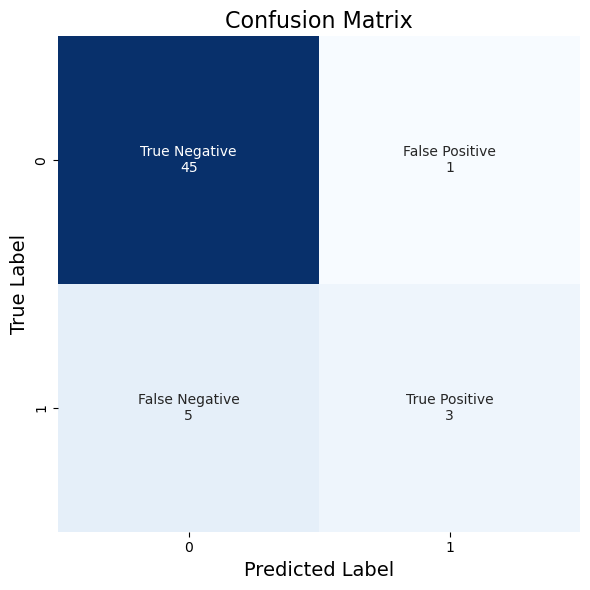

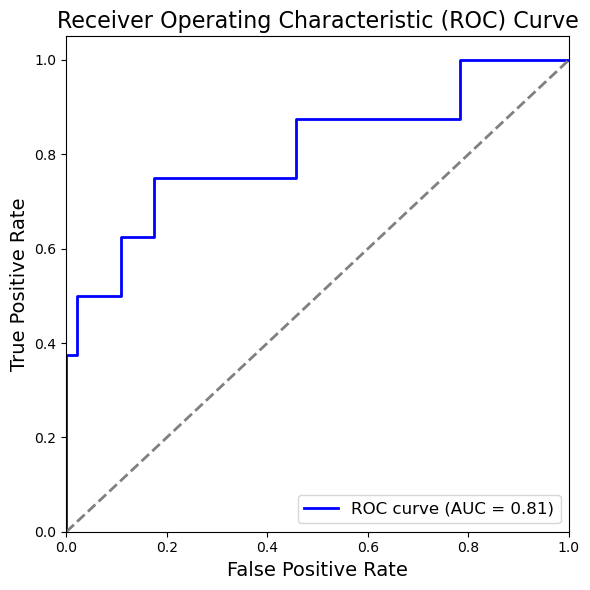

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        46
           1       0.75      0.38      0.50         8

    accuracy                           0.89        54
   macro avg       0.82      0.68      0.72        54
weighted avg       0.88      0.89      0.87        54


Validation Steps:2-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5886 - loss: 0.7158 - val_accuracy: 0.8611 - val_loss: 0.4630
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8572 - loss: 0.5022 - val_accuracy: 0.8611 - val_loss: 0.4158
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8834 - loss: 0.3718 - val_accuracy: 0.8611 - val_loss: 0.4300
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8942 - loss: 0.3523 - val_accuracy: 0.8611 - val_loss: 0.4175
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8957 - loss: 0.3231 - val_accuracy: 0.8472 - v

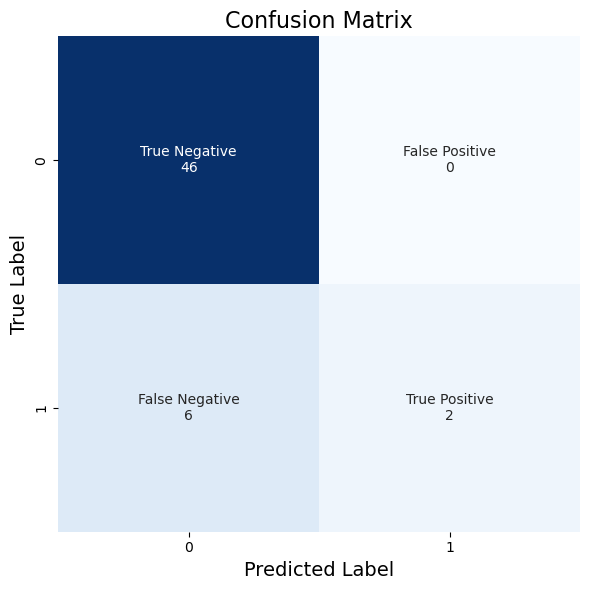

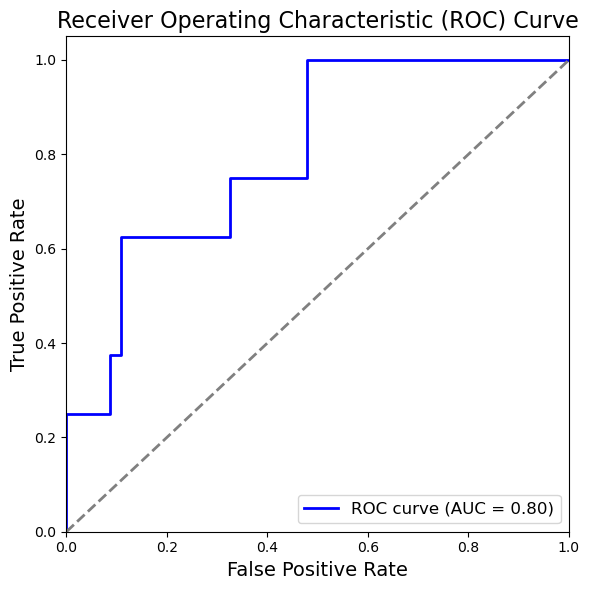

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        46
           1       1.00      0.25      0.40         8

    accuracy                           0.89        54
   macro avg       0.94      0.62      0.67        54
weighted avg       0.90      0.89      0.86        54


Validation Steps:3-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5416 - loss: 0.7188 - val_accuracy: 0.8592 - val_loss: 0.5339
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8688 - loss: 0.4776 - val_accuracy: 0.8592 - val_loss: 0.4500
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8616 - loss: 0.3828 - val_accuracy: 0.8732 - val_loss: 0.4260
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8365 - loss: 0.3751 - val_accuracy: 0.8732 - val_loss: 0.4308
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8756 - loss: 0.2915 - val_accuracy: 0.8732 - v

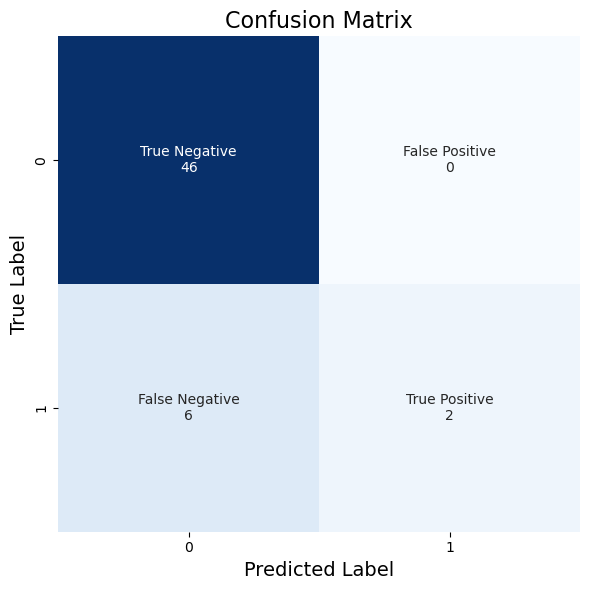

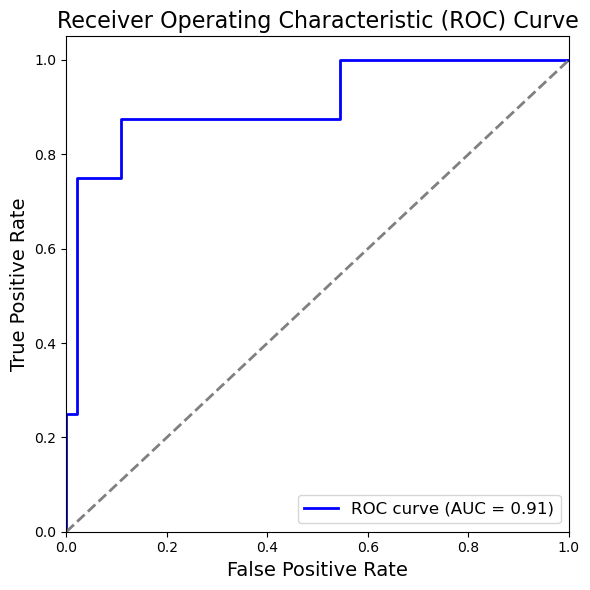

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        46
           1       1.00      0.25      0.40         8

    accuracy                           0.89        54
   macro avg       0.94      0.62      0.67        54
weighted avg       0.90      0.89      0.86        54


Validation Steps:4-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8384 - loss: 0.5150 - val_accuracy: 0.8592 - val_loss: 0.3599
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8705 - loss: 0.3760 - val_accuracy: 0.8592 - val_loss: 0.3486
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8505 - loss: 0.3645 - val_accuracy: 0.8451 - val_loss: 0.3759
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8676 - loss: 0.2827 - val_accuracy: 0.8592 - val_loss: 0.3556
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8703 - loss: 0.2748 - val_accuracy: 0.8592 - v

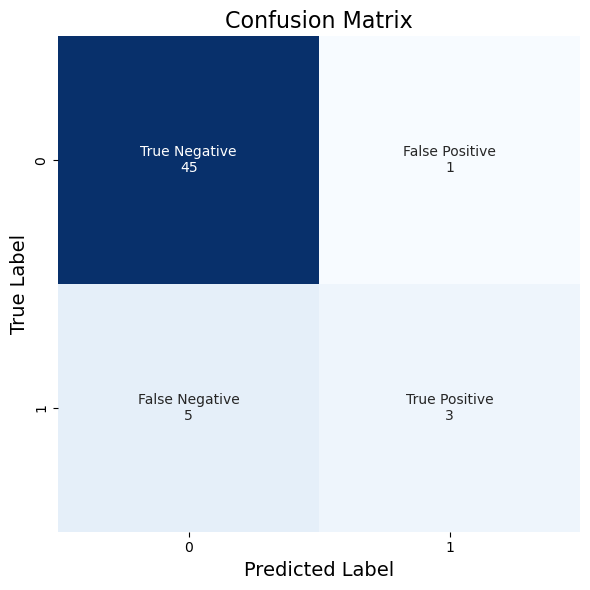

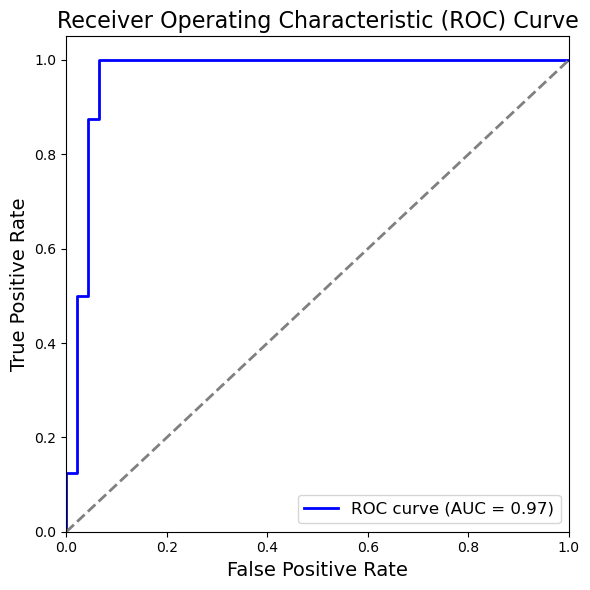

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        46
           1       0.75      0.38      0.50         8

    accuracy                           0.89        54
   macro avg       0.82      0.68      0.72        54
weighted avg       0.88      0.89      0.87        54


Validation Steps:5-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4010 - loss: 0.7694 - val_accuracy: 0.8592 - val_loss: 0.5461
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8346 - loss: 0.4904 - val_accuracy: 0.8592 - val_loss: 0.4084
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8540 - loss: 0.4228 - val_accuracy: 0.8592 - val_loss: 0.3493
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8965 - loss: 0.3372 - val_accuracy: 0.8732 - val_loss: 0.3603
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8904 - loss: 0.3221 - val_accuracy: 0.8873 - v

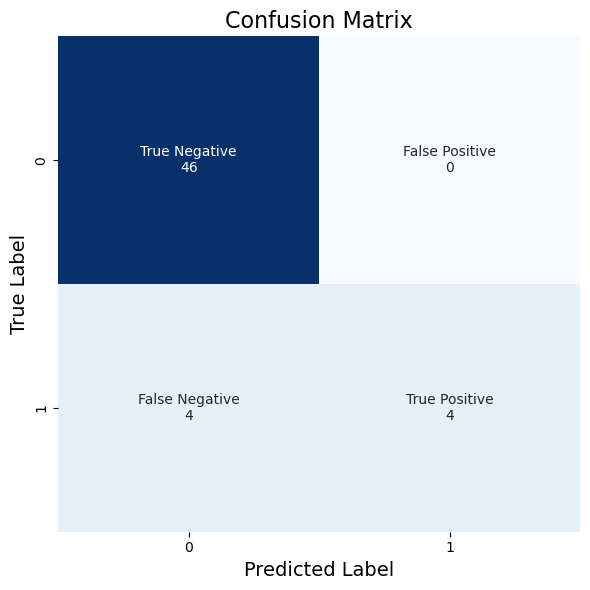

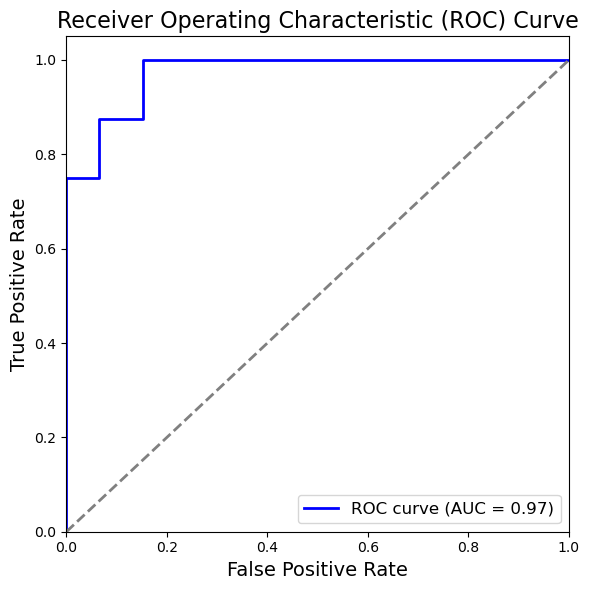

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        46
           1       1.00      0.50      0.67         8

    accuracy                           0.93        54
   macro avg       0.96      0.75      0.81        54
weighted avg       0.93      0.93      0.92        54

Average cross-validation accuracy: 0.8600156426429748


In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Fix random seeds for reproducibility
def set_seed(seed_value):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Set the seed
seed_value = 42
set_seed(seed_value)


# Define the cross-validation method
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []
index = 1
# Cross-validation loop
for train_index, val_index in stratified_kfold.split(x_df, y_df_binarized):
    X_train, X_val = x_df.iloc[train_index], x_df.iloc[val_index]
    y_train, y_val = y_df_binarized[train_index], y_df_binarized[val_index]

    # Define the model
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    print(f'\nValidation Steps:{index}-----------------------------------------------\n')

    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)
    checkpoint_callback = ModelCheckpoint(f'val_{index}.keras', monitor='val_loss', save_best_only=True, mode='min')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint_callback],
                        verbose=1)

    evaluate_model(X_test, y_test, model_path=f'val_{index}.keras', threshold=0.5)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    results.append(val_accuracy)
    index+=1

print(f'Average cross-validation accuracy: {np.mean(results)}')


## Oversampling (SMOTE)

## Oversampling(o) / Sample Weights(o)


Validation Steps:1-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5423 - loss: 3.5552 - val_accuracy: 0.2917 - val_loss: 1.0757
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6716 - loss: 2.7272 - val_accuracy: 0.4444 - val_loss: 0.8220
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7372 - loss: 2.0642 - val_accuracy: 0.6250 - val_loss: 0.6365
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8385 - loss: 1.4574 - val_accuracy: 0.8056 - val_loss: 0.6096
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8907 - loss: 1.1313 - val_accuracy: 0.7083 - val_loss: 0.5927
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8759 - loss: 0.9648 - val_accuracy: 0.8194 - val_loss: 0.6596
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8951 - loss: 1.0501 - val_accuracy: 0.7917 - val_loss: 0.7007
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

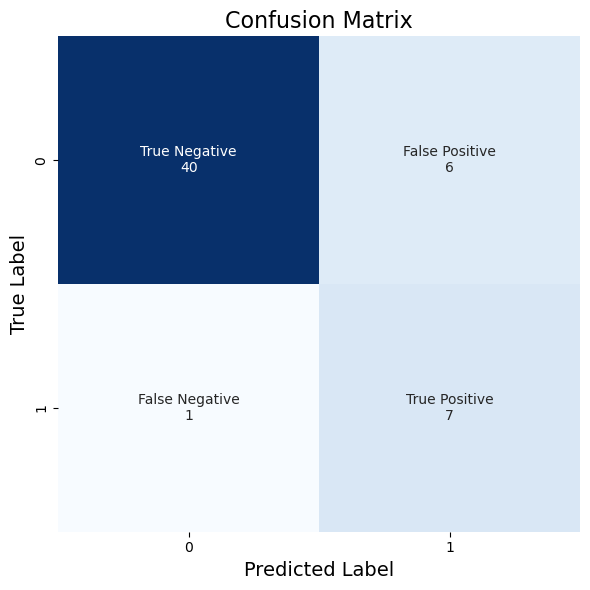

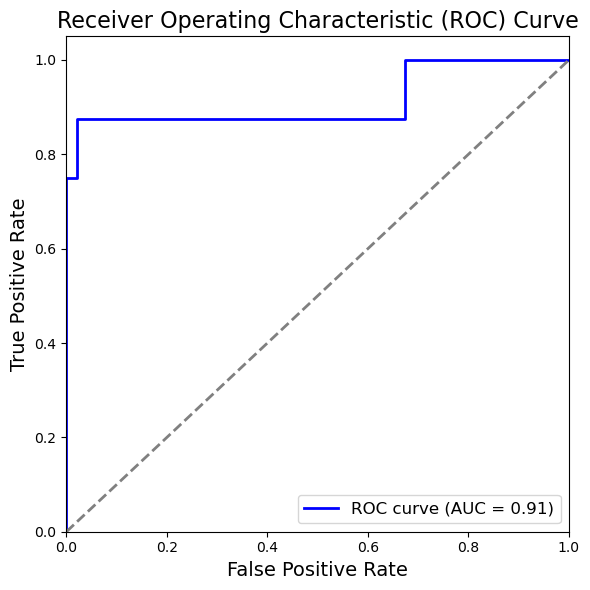

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        46
           1       0.54      0.88      0.67         8

    accuracy                           0.87        54
   macro avg       0.76      0.87      0.79        54
weighted avg       0.91      0.87      0.88        54


Validation Steps:2-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5668 - loss: 3.2359 - val_accuracy: 0.4583 - val_loss: 0.8518
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7585 - loss: 2.1969 - val_accuracy: 0.5972 - val_loss: 0.7497
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8392 - loss: 1.6530 - val_accuracy: 0.6250 - val_loss: 0.8354
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8469 - loss: 1.4498 - val_accuracy: 0.6806 - val_loss: 0.7071
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8810 - loss: 1.1500 - val_accuracy: 

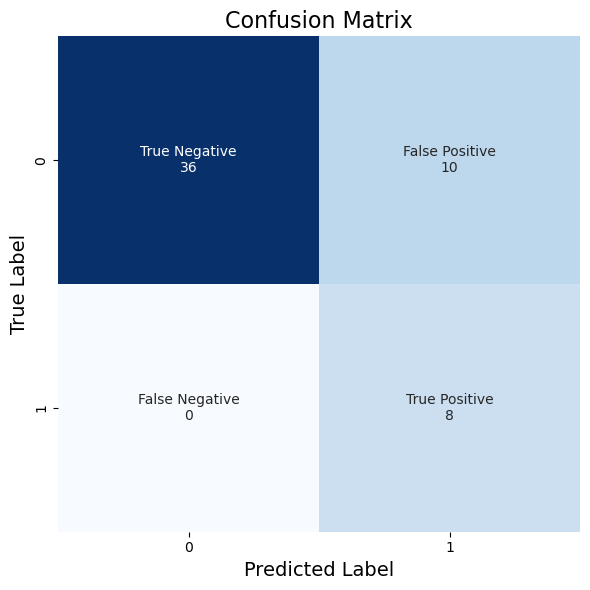

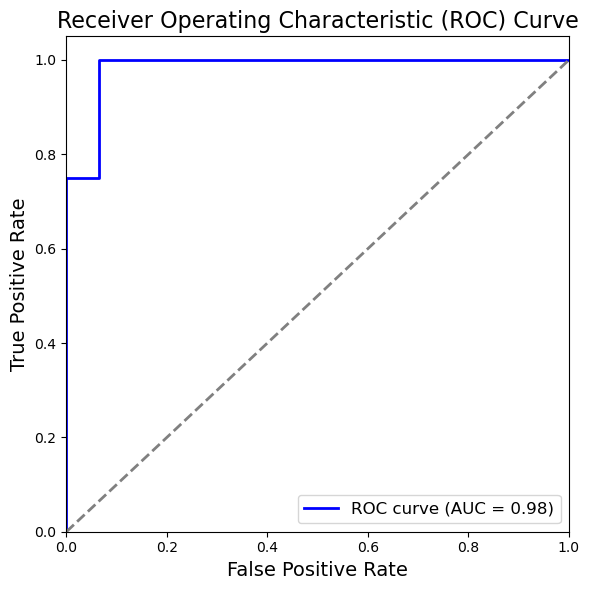

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        46
           1       0.44      1.00      0.62         8

    accuracy                           0.81        54
   macro avg       0.72      0.89      0.75        54
weighted avg       0.92      0.81      0.84        54


Validation Steps:3-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5559 - loss: 3.3017 - val_accuracy: 0.4648 - val_loss: 0.9325
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 2.6112 - val_accuracy: 0.6056 - val_loss: 0.9615
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 1.9721 - val_accuracy: 0.5915 - val_loss: 0.8469
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 1.5071 - val_accuracy: 0.6338 - val_loss: 0.9361
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8883 - loss: 1.1036 - val_accuracy: 

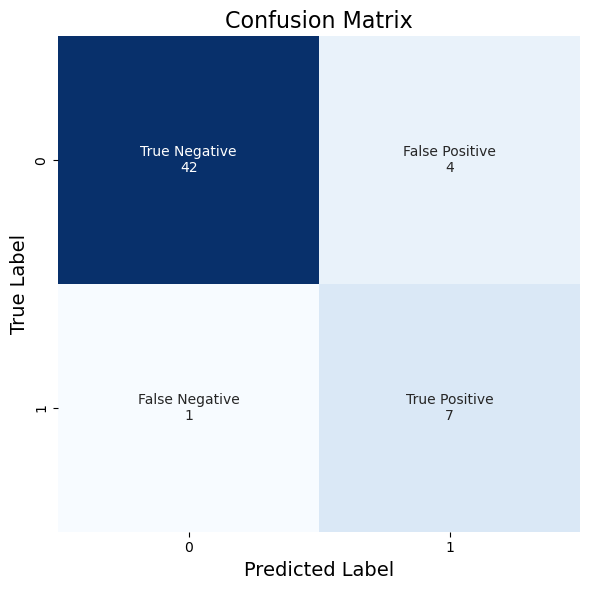

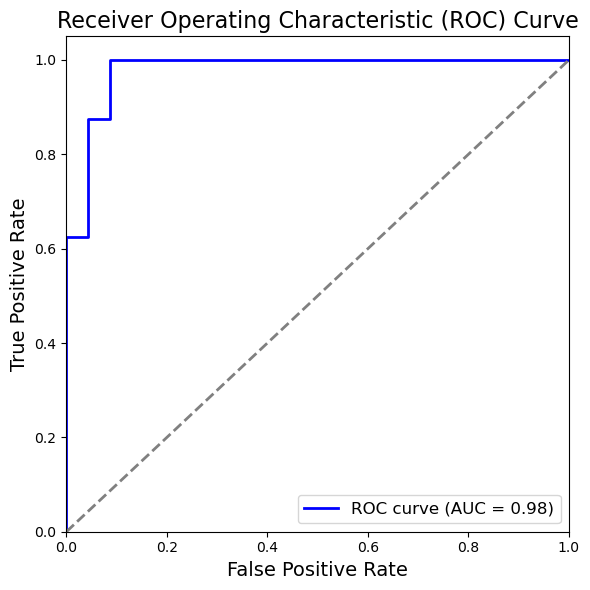

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.64      0.88      0.74         8

    accuracy                           0.91        54
   macro avg       0.81      0.89      0.84        54
weighted avg       0.93      0.91      0.91        54


Validation Steps:4-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6202 - loss: 4.4207 - val_accuracy: 0.5070 - val_loss: 1.1132
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6892 - loss: 2.7009 - val_accuracy: 0.5634 - val_loss: 0.9563
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 2.2125 - val_accuracy: 0.6056 - val_loss: 0.8477
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7753 - loss: 1.8097 - val_accuracy: 0.6056 - val_loss: 1.0625
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8002 - loss: 1.7105 - val_accuracy: 

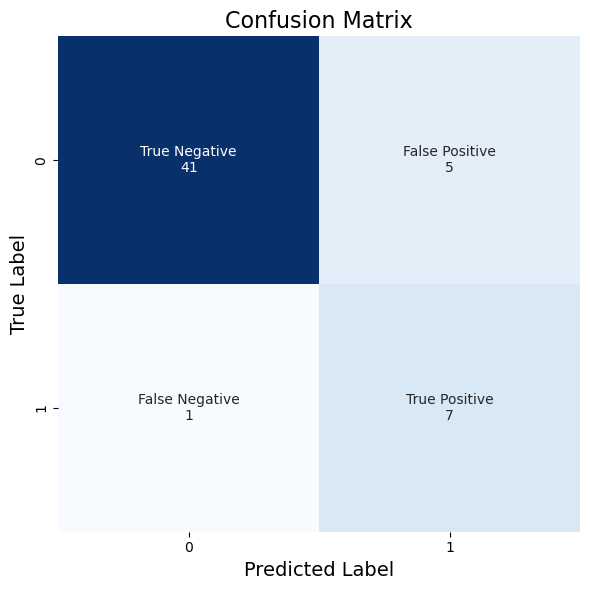

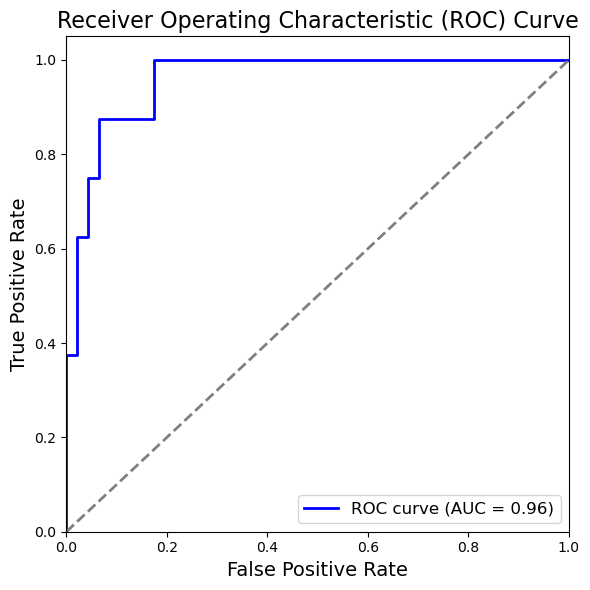

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        46
           1       0.58      0.88      0.70         8

    accuracy                           0.89        54
   macro avg       0.78      0.88      0.82        54
weighted avg       0.92      0.89      0.90        54


Validation Steps:5-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5127 - loss: 3.5005 - val_accuracy: 0.4507 - val_loss: 0.9055
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6919 - loss: 2.4376 - val_accuracy: 0.6479 - val_loss: 0.5993
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8388 - loss: 1.6149 - val_accuracy: 0.7746 - val_loss: 0.4732
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9173 - loss: 1.1706 - val_accuracy: 0.8028 - val_loss: 0.4665
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9651 - loss: 0.6702 - val_accuracy: 

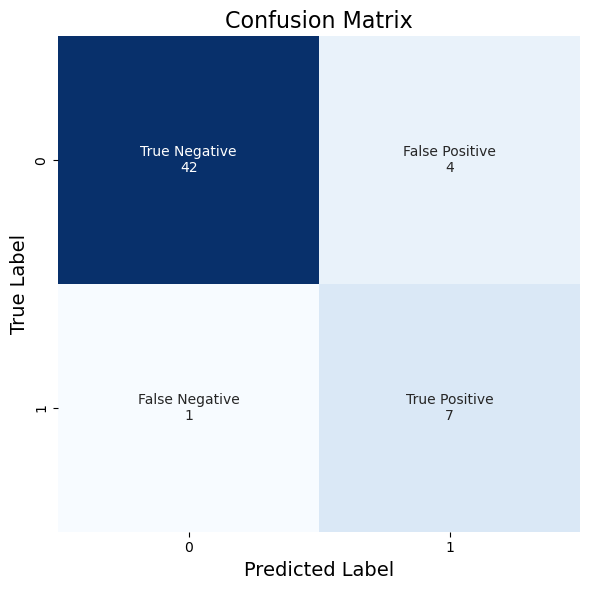

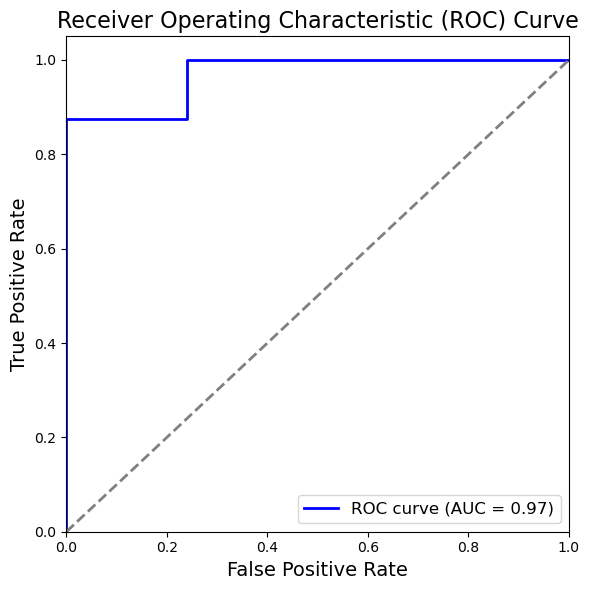

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.64      0.88      0.74         8

    accuracy                           0.91        54
   macro avg       0.81      0.89      0.84        54
weighted avg       0.93      0.91      0.91        54

Average cross-validation accuracy: 0.8010954618453979


In [177]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

# Fix random seeds for reproducibility
def set_seed(seed_value):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Set the seed
seed_value = 42
set_seed(seed_value)



# Define the cross-validation method
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []
index = 1
class_weights_dict = {0 : 3, 1 : 10}
# Cross-validation loop
for train_index, val_index in stratified_kfold.split(x_df, y_df_binarized):
    X_train, X_val = x_df.iloc[train_index], x_df.iloc[val_index]
    y_train, y_val = y_df_binarized[train_index], y_df_binarized[val_index]

    smote = SMOTE(random_state=42)

    X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

    # Data flatten
    y_train_s = np.ravel(y_train_s)
    y_test = np.ravel(y_test)

    # Compute sample weights
    sample_weights = compute_sample_weight(class_weight=class_weights_dict, y=y_train_s)
    
    # Define the model
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    print(f'\nValidation Steps:{index}-----------------------------------------------\n')

    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)
    checkpoint_callback = ModelCheckpoint(f'val_{index}.keras', monitor='val_loss', save_best_only=True, mode='min')
    
    # Train the model
    history = model.fit(X_train_s, y_train_s, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint_callback],
                        verbose=1,
                       sample_weight=sample_weights)
    

    evaluate_model(X_test, y_test, model_path=f'val_{index}.keras', threshold=0.5)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    results.append(val_accuracy)
    index+=1

print(f'Average cross-validation accuracy: {np.mean(results)}')

## Oversample (x) & Sample Weights (o)


Validation Steps:1-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3711 - loss: 3.0433 - val_accuracy: 0.5417 - val_loss: 0.6605
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6101 - loss: 2.4301 - val_accuracy: 0.7361 - val_loss: 0.5510
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7850 - loss: 2.1620 - val_accuracy: 0.8889 - val_loss: 0.5019
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 1.9714 - val_accuracy: 0.7361 - val_loss: 0.5318
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7843 - loss: 1.8203 - val_accuracy: 0.8750 - val_loss: 0.4293
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8792 - loss: 1.5686 - val_accuracy: 0.8472 - val_loss: 0.4761
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9074 - loss: 1.3412 - val_accuracy: 0.8333 - val_loss: 0.4804
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8

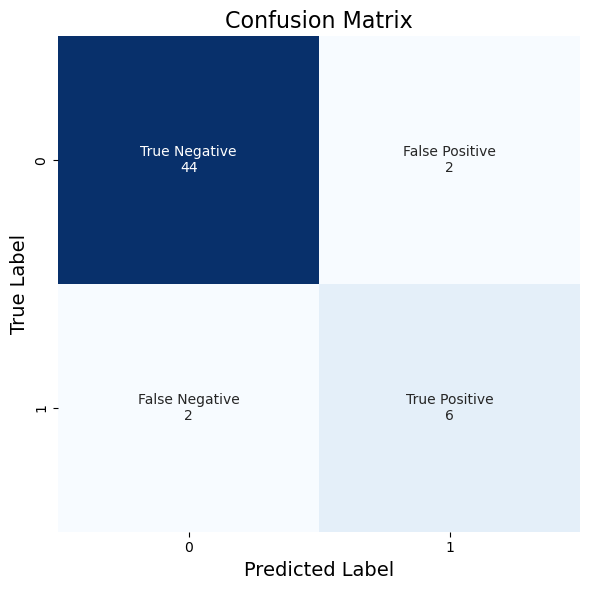

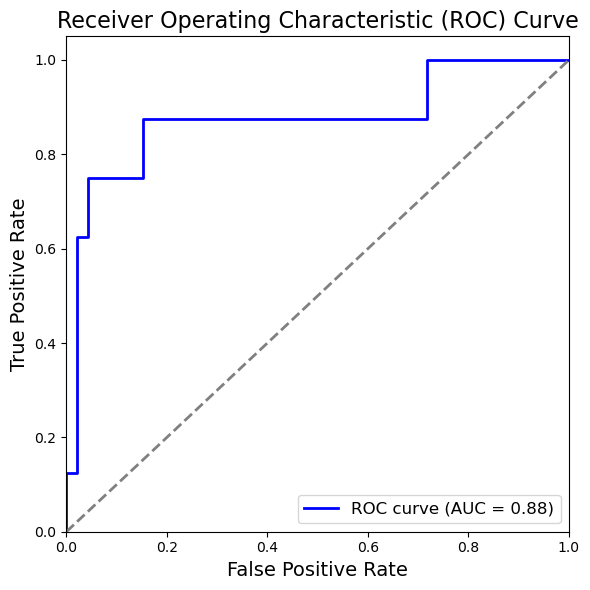

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.75      0.75      0.75         8

    accuracy                           0.93        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.93      0.93      0.93        54


Validation Steps:2-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4938 - loss: 2.8569 - val_accuracy: 0.7361 - val_loss: 0.5564
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7484 - loss: 2.4834 - val_accuracy: 0.7778 - val_loss: 0.4802
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8431 - loss: 2.0128 - val_accuracy: 0.8333 - val_loss: 0.4431
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7914 - loss: 2.1059 - val_accuracy: 0.7500 - val_loss: 0.4823
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8931 - loss: 1.6271 - val_accuracy: 0.8472 - v

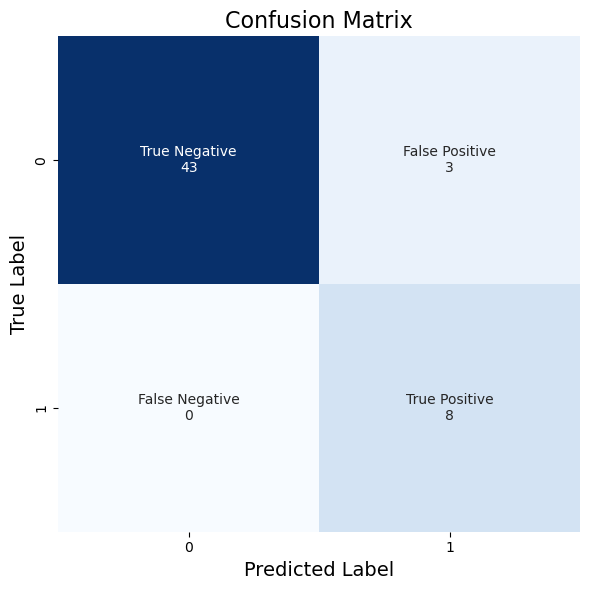

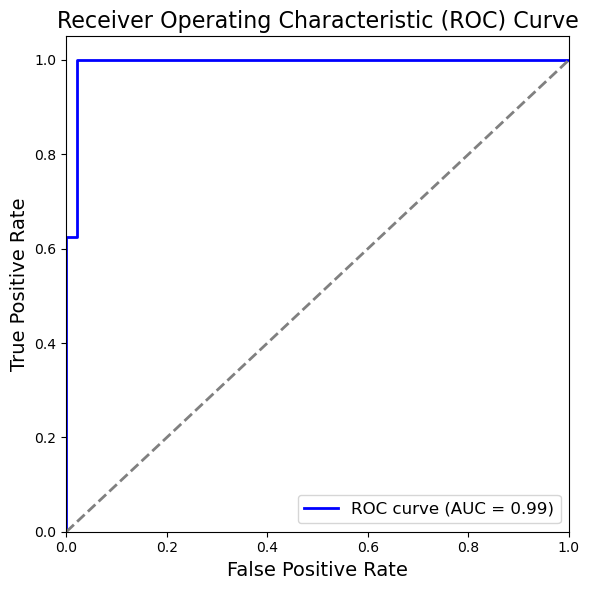

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.73      1.00      0.84         8

    accuracy                           0.94        54
   macro avg       0.86      0.97      0.90        54
weighted avg       0.96      0.94      0.95        54


Validation Steps:3-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4244 - loss: 2.8136 - val_accuracy: 0.5915 - val_loss: 0.6161
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7302 - loss: 2.3941 - val_accuracy: 0.7465 - val_loss: 0.5084
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8241 - loss: 2.1141 - val_accuracy: 0.7746 - val_loss: 0.4826
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8206 - loss: 1.9597 - val_accuracy: 0.7746 - val_loss: 0.4499
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8842 - loss: 1.6694 - val_accuracy: 0.7324 - v

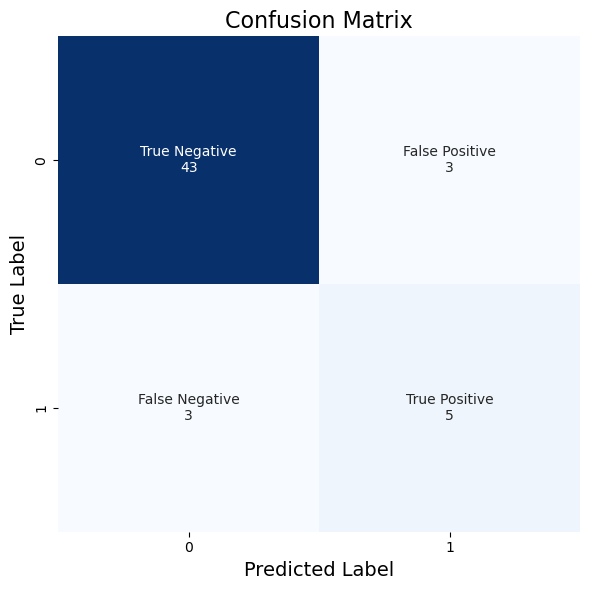

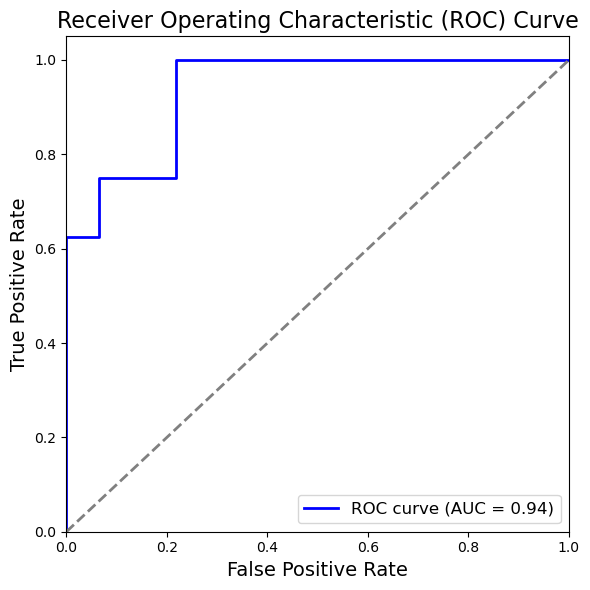

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.62      0.62      0.62         8

    accuracy                           0.89        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.89      0.89      0.89        54


Validation Steps:4-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7833 - loss: 2.7108 - val_accuracy: 0.8169 - val_loss: 0.4659
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7896 - loss: 2.3569 - val_accuracy: 0.7606 - val_loss: 0.6059
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7070 - loss: 2.3865 - val_accuracy: 0.7746 - val_loss: 0.4897
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8272 - loss: 1.8014 - val_accuracy: 0.8310 - val_loss: 0.4032
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8486 - loss: 1.6473 - val_accuracy: 0.8592 - v

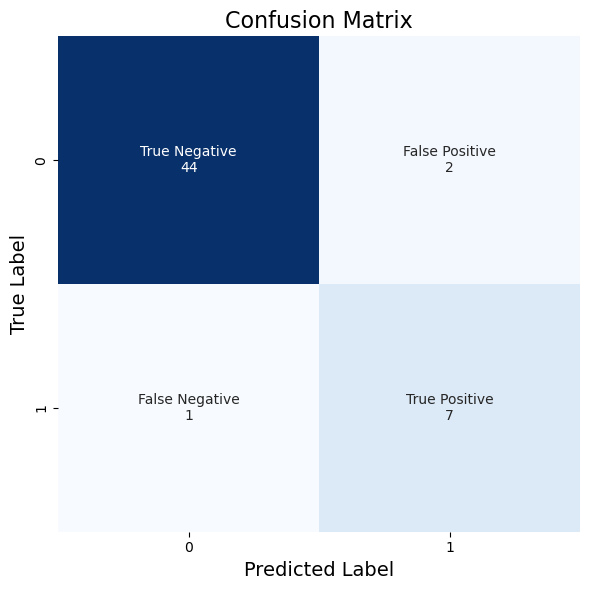

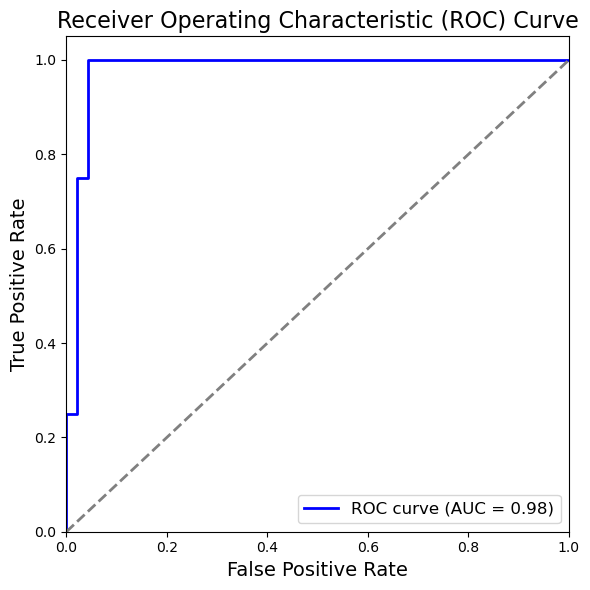

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.78      0.88      0.82         8

    accuracy                           0.94        54
   macro avg       0.88      0.92      0.90        54
weighted avg       0.95      0.94      0.95        54


Validation Steps:5-----------------------------------------------

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3574 - loss: 2.9569 - val_accuracy: 0.8592 - val_loss: 0.5160
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7574 - loss: 2.4620 - val_accuracy: 0.7887 - val_loss: 0.5003
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7666 - loss: 2.0568 - val_accuracy: 0.7606 - val_loss: 0.4370
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8137 - loss: 1.9017 - val_accuracy: 0.8592 - val_loss: 0.4009
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8485 - loss: 1.7174 - val_accuracy: 0.7887 - v

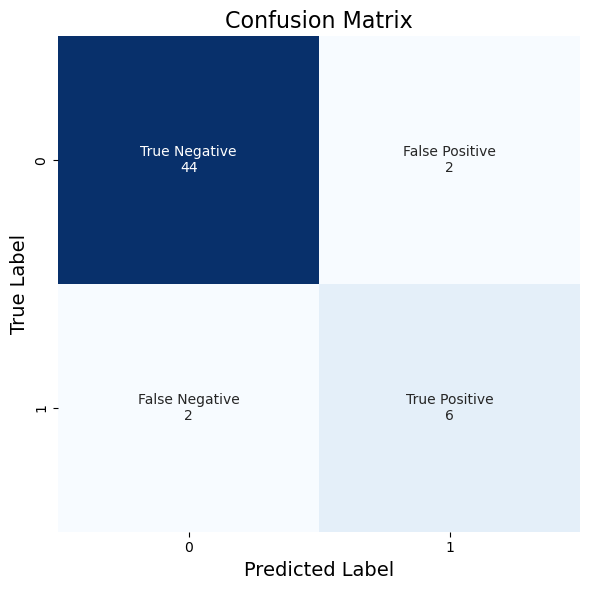

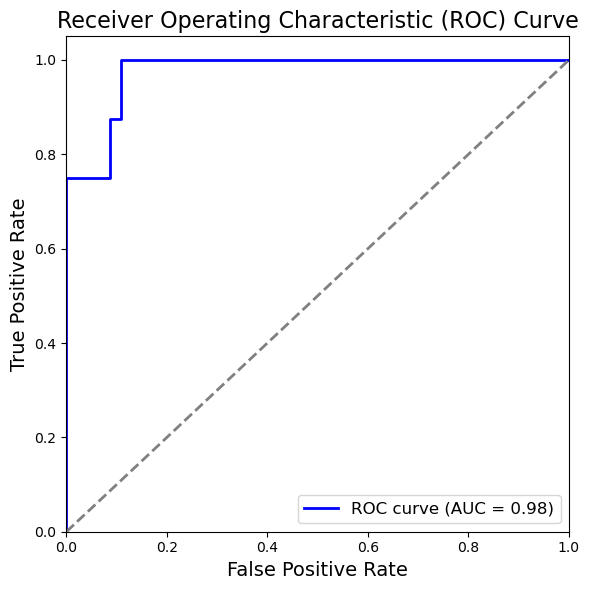

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.75      0.75      0.75         8

    accuracy                           0.93        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.93      0.93      0.93        54

Average cross-validation accuracy: 0.8038732409477234


In [178]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

# Fix random seeds for reproducibility
def set_seed(seed_value):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Set the seed
seed_value = 42
set_seed(seed_value)



# Define the cross-validation method
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []
index = 1
class_weights_dict = {0 : 3, 1 : 10}
# Cross-validation loop
for train_index, val_index in stratified_kfold.split(x_df, y_df_binarized):
    X_train, X_val = x_df.iloc[train_index], x_df.iloc[val_index]
    y_train, y_val = y_df_binarized[train_index], y_df_binarized[val_index]



    # Compute sample weights
    sample_weights = compute_sample_weight(class_weight=class_weights_dict, y=y_train)
    
    # Define the model
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    print(f'\nValidation Steps:{index}-----------------------------------------------\n')

    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)
    checkpoint_callback = ModelCheckpoint(f'val_{index}.keras', monitor='val_loss', save_best_only=True, mode='min')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint_callback],
                        verbose=1,
                       sample_weight=sample_weights)

    evaluate_model(X_test, y_test, model_path=f'val_{index}.keras', threshold=0.5)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    results.append(val_accuracy)
    index+=1

print(f'Average cross-validation accuracy: {np.mean(results)}')

## Oversampling (o) & Sample Weights (x)


Validation Steps:1-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5751 - loss: 0.6981 - val_accuracy: 0.6528 - val_loss: 0.6216
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7572 - loss: 0.5744 - val_accuracy: 0.7083 - val_loss: 0.5518
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.4757 - val_accuracy: 0.7361 - val_loss: 0.5418
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8369 - loss: 0.3739 - val_accuracy: 0.8333 - val_loss: 0.4694
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8779 - loss: 0.3122 - val_accuracy: 0.8333 - val_loss: 0.4828
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9125 - loss: 0.2246 - val_accuracy: 0.8194 - val_loss: 0.4749
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9305 - loss: 0.1941 - val_accuracy: 0.8333 - val_loss: 0.5424
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

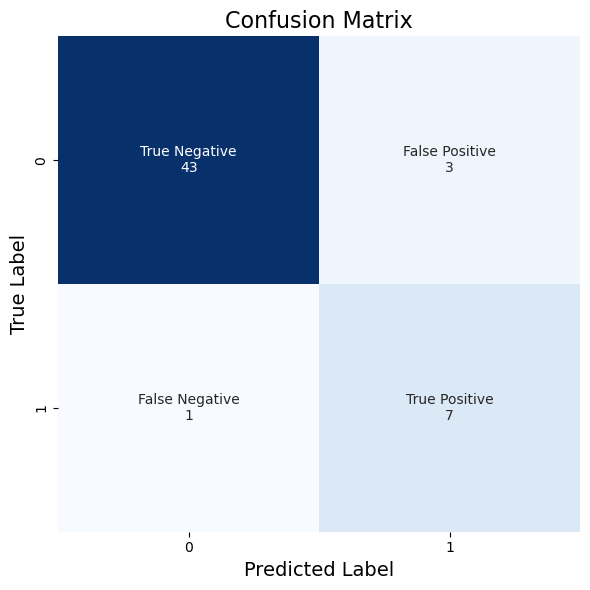

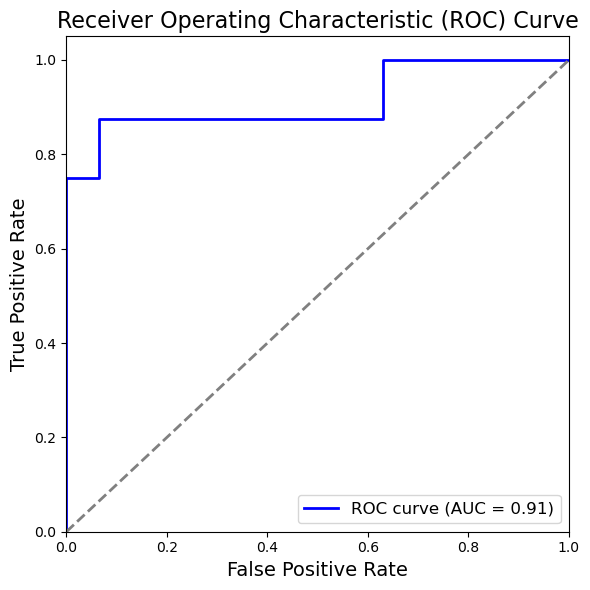

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.70      0.88      0.78         8

    accuracy                           0.93        54
   macro avg       0.84      0.90      0.87        54
weighted avg       0.94      0.93      0.93        54


Validation Steps:2-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6059 - loss: 0.6589 - val_accuracy: 0.7222 - val_loss: 0.5705
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4758 - val_accuracy: 0.7361 - val_loss: 0.4725
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.4050 - val_accuracy: 0.7500 - val_loss: 0.4904
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.2859 - val_accuracy: 0.7361 - val_loss: 0.4897
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9329 - loss: 0.2247 - val_accuracy: 

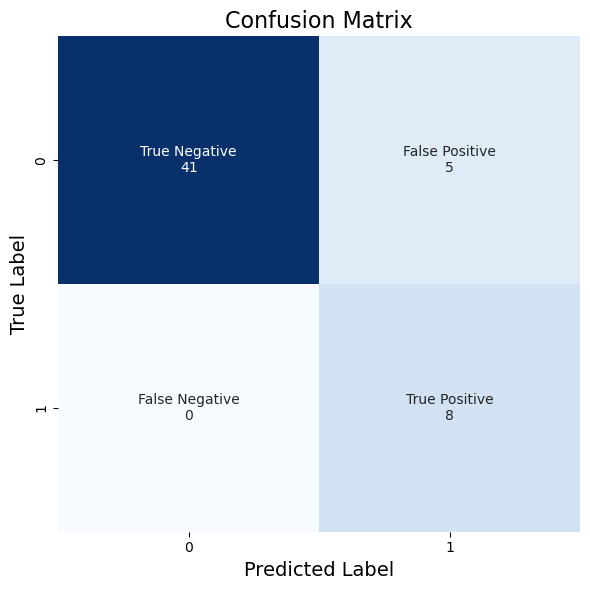

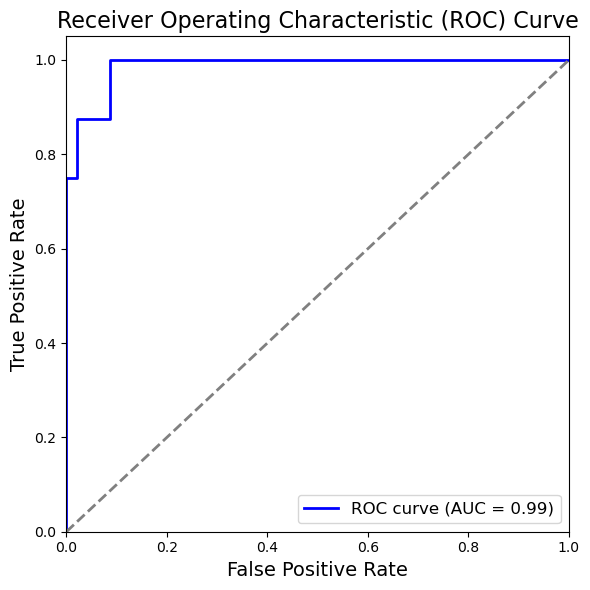

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        46
           1       0.62      1.00      0.76         8

    accuracy                           0.91        54
   macro avg       0.81      0.95      0.85        54
weighted avg       0.94      0.91      0.92        54


Validation Steps:3-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5240 - loss: 0.6845 - val_accuracy: 0.5915 - val_loss: 0.6505
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7999 - loss: 0.5054 - val_accuracy: 0.6479 - val_loss: 0.5650
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.3886 - val_accuracy: 0.6901 - val_loss: 0.5455
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.3428 - val_accuracy: 0.7042 - val_loss: 0.5826
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9323 - loss: 0.2472 - val_accuracy: 

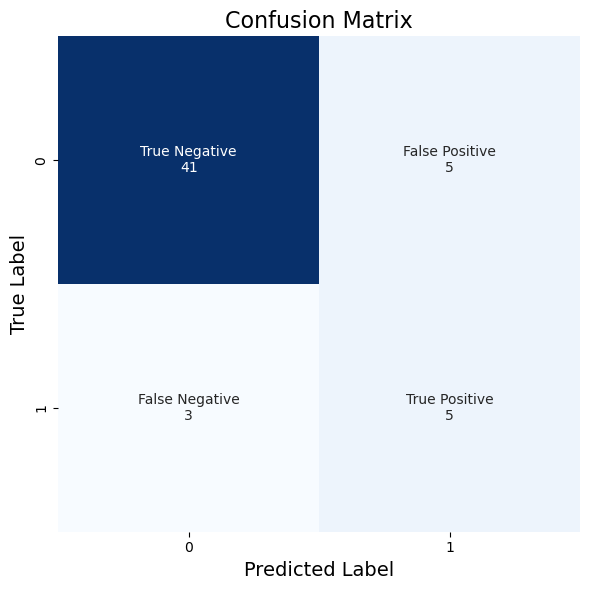

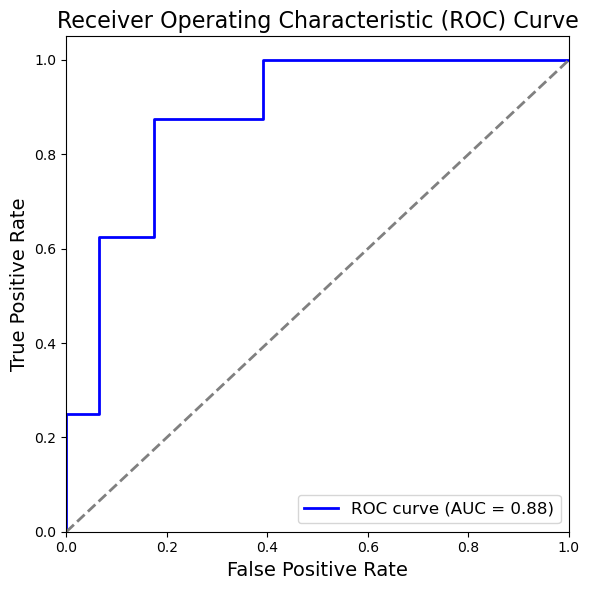

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        46
           1       0.50      0.62      0.56         8

    accuracy                           0.85        54
   macro avg       0.72      0.76      0.73        54
weighted avg       0.87      0.85      0.86        54


Validation Steps:4-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6359 - loss: 0.6723 - val_accuracy: 0.6901 - val_loss: 0.4966
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7755 - loss: 0.4450 - val_accuracy: 0.7465 - val_loss: 0.4878
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.3647 - val_accuracy: 0.7183 - val_loss: 0.5816
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.3245 - val_accuracy: 0.7606 - val_loss: 0.6312
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3159 - val_accuracy: 

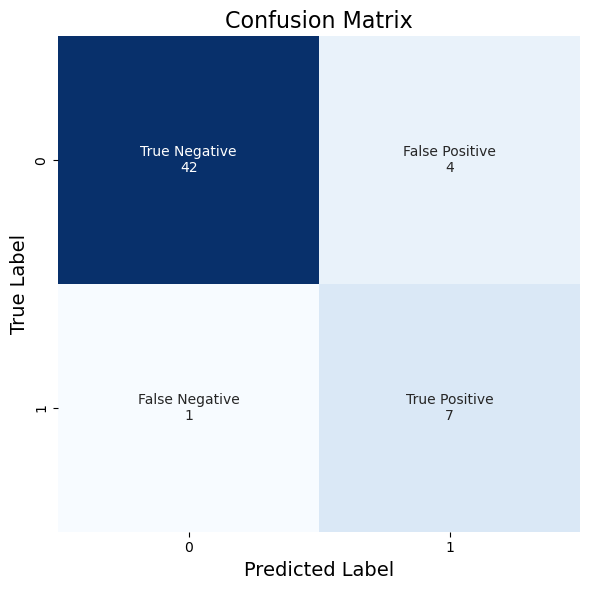

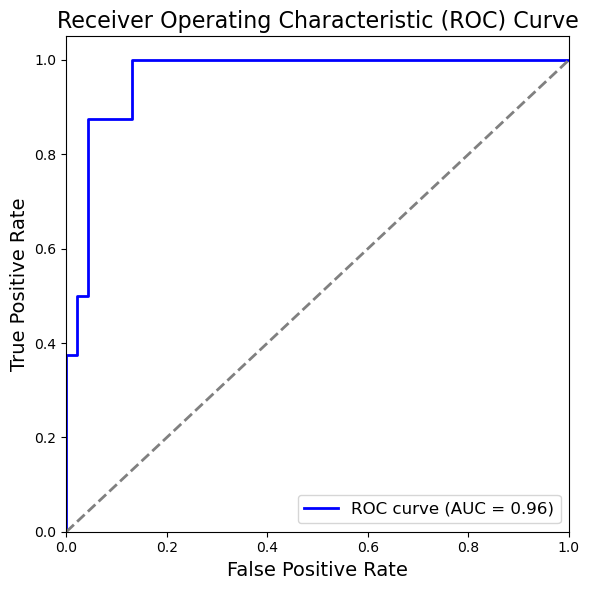

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.64      0.88      0.74         8

    accuracy                           0.91        54
   macro avg       0.81      0.89      0.84        54
weighted avg       0.93      0.91      0.91        54


Validation Steps:5-----------------------------------------------

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5604 - loss: 0.7396 - val_accuracy: 0.6761 - val_loss: 0.5767
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7904 - loss: 0.5195 - val_accuracy: 0.7324 - val_loss: 0.5320
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8596 - loss: 0.3890 - val_accuracy: 0.8451 - val_loss: 0.3601
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.3420 - val_accuracy: 0.8592 - val_loss: 0.3534
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.2053 - val_accuracy: 

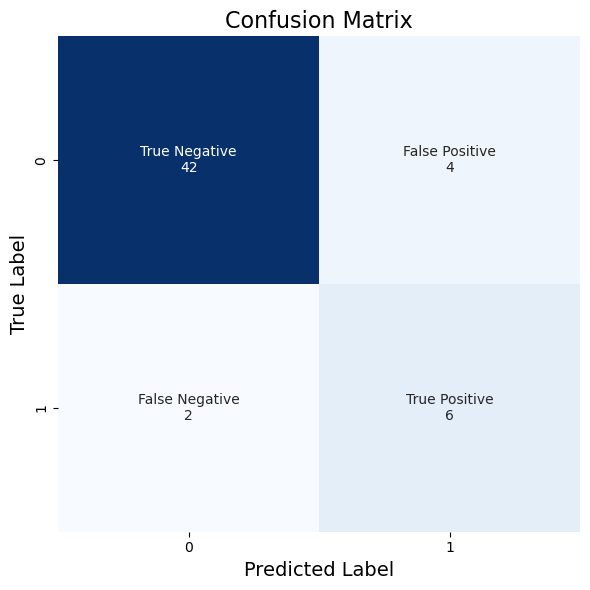

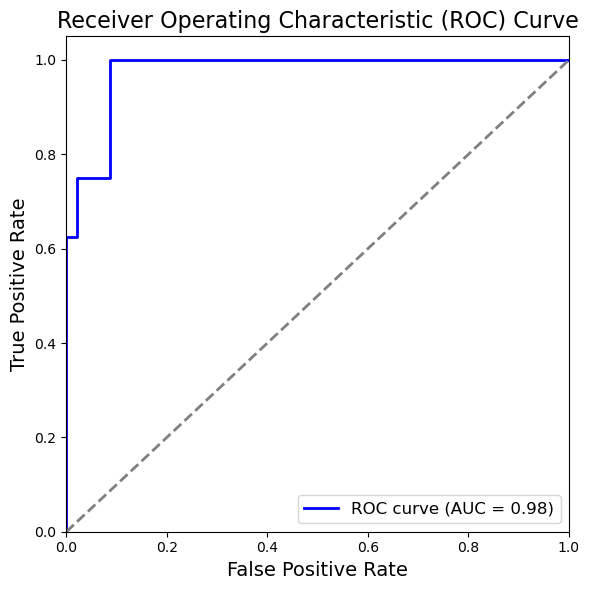

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.60      0.75      0.67         8

    accuracy                           0.89        54
   macro avg       0.78      0.83      0.80        54
weighted avg       0.90      0.89      0.89        54

Average cross-validation accuracy: 0.8235915541648865


In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

# Fix random seeds for reproducibility
def set_seed(seed_value):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Set the seed
seed_value = 42
set_seed(seed_value)



# Define the cross-validation method
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []
index = 1
class_weights_dict = {0 : 3, 1 : 10}
# Cross-validation loop
for train_index, val_index in stratified_kfold.split(x_df, y_df_binarized):
    X_train, X_val = x_df.iloc[train_index], x_df.iloc[val_index]
    y_train, y_val = y_df_binarized[train_index], y_df_binarized[val_index]

    smote = SMOTE(random_state=42)

    X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

    # Data flatten
    y_train_s = np.ravel(y_train_s)
    y_test = np.ravel(y_test)

    
    # Define the model
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    print(f'\nValidation Steps:{index}-----------------------------------------------\n')

    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)
    checkpoint_callback = ModelCheckpoint(f'val_{index}.keras', monitor='val_loss', save_best_only=True, mode='min')
    
    # Train the model
    history = model.fit(X_train_s, y_train_s, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint_callback],
                        verbose=1)

    evaluate_model(X_test, y_test, model_path=f'val_{index}.keras', threshold=0.5)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    results.append(val_accuracy)
    index+=1

print(f'Average cross-validation accuracy: {np.mean(results)}')